In [10]:
# Intall ultralytics YOLOv8, OpenCV and matplotlib for visualization
!pip install -q ultralytics opencv-python-headless matplotlib

# Import the YOLO interface from ultralytics
from ultralytics import YOLO

# Import files helper to uplad local files
from google.colab import files

# Import OpenCV for image read/format
import cv2

# Import matplotlib to display images
import  matplotlib.pyplot as plt

# Import numpy for numeric operations
import numpy as np

# Print versions so we can see what was installed
import ultralytics,sys
print("ultralytics version", ultralytics.__version__)
print("opencv version", cv2.__version__)
print("python version" , sys.version)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
ultralytics version 8.3.226
opencv version 4.12.0
python version 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [11]:
uploded = files.upload()

if uploded :
  img_path = next(iter(uploded))
  print("uploaded", img_path)
else:
  img_path = 'uploded image'
  print("uploaded", img_path)

Saving example.jpg to example.jpg
uploaded example.jpg


In [12]:
# Load a small pretrained YOLOv8 model
# The first time this runs it will download the model weights automatically.
model = YOLO('yolov8n.pt') # load YOLOv8-nano pretrained on COCO (weights downloaded if needed)

# Run inference on the image path; results is a Results object
result = model(img_path)

# Print a short summary of visibility
print("Completed inference. Number of result images", len(result))



image 1/1 /content/example.jpg: 416x640 17 persons, 333.9ms
Speed: 18.1ms preprocess, 333.9ms inference, 37.0ms postprocess per image at shape (1, 3, 416, 640)
Completed inference. Number of result images 1


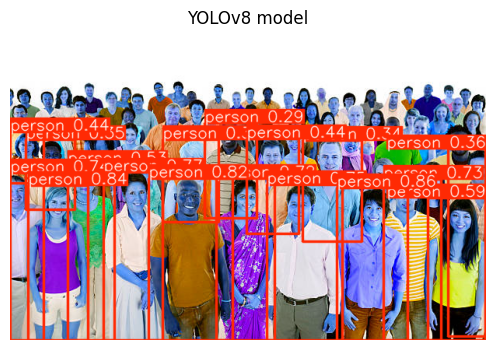

In [13]:
res0 = result[0].cpu() # move tensors to CPU to allow numpy conversion and plot it

annotate = res0.plot()

# Print a short summary of visibility
plt.figure(figsize=(12,4))
plt.imshow(annotate)
plt.title('YOLOv8 model')
plt.axis('off')
plt.show()